In [65]:
# Import Librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataprep as dp
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns


In [58]:
df_ml = pd.read_parquet('./movies_completo_ML.parquet')

In [59]:
df_ml.head(2)

,id,userId,score,title
0,ns2186,1,4.5,horse tribe
1,ns2186,231,4.0,horse tribe


In [60]:
df_ml.columns

Index(['id', 'userId', 'score', 'title'], dtype='object')

In [62]:
print(len(df_ml['userId'].unique()))

113937


In [63]:
# Calificaciones de peliculas por usuario

df_ml_by_users = df_ml.groupby(['userId']).count()
df_ml_by_users.head()

,id,score,title
userId,,,
1,24,24,24
2,16,16,16
3,6,6,6
4,54,54,54
5,24,24,24


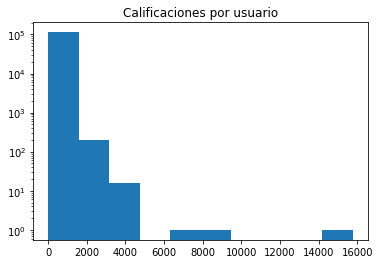

In [67]:
plt.hist(df_ml_by_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

In [69]:
# Pelicula con mas calificacion

df_ml_by_movies = df_ml.groupby(['title']).count()
df_ml_by_movies.head()

,id,userId,score
title,,,
"""mixed up""",467,467,467
"""the paramedic angel""",513,513,513
#alive,472,472,472
#annefrank - parallel stories,493,493,493
#blackaf,515,515,515


KeyError: 'The grouper name timestamp is not found'

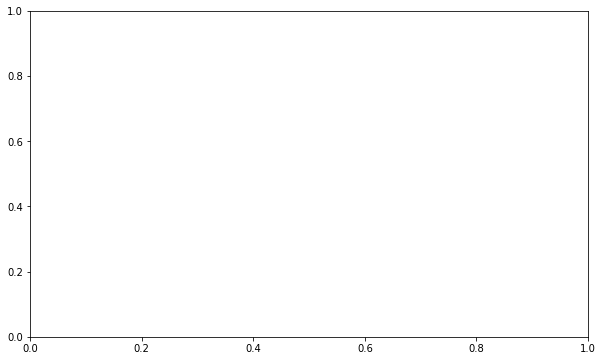

In [72]:
# Configuramos la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupamos los datos por día usando resample()
frecuencia = df_ml.resample('D', on='release_year').count()

# Graficamos los resultados
ax.plot(frecuencia.index, frecuencia['score'])

# Configuramos las etiquetas del eje x y el título del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia por día')

# Mostramos el gráfico
plt.show()